### DIPLOMATURA EN CIENCIA DE DATOS 2019

#### CORACIÓN DE DATOS

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Usaremos la bliblioteca Pandas para leer los datos a partir del archivo dataset.csv que los contiene y mostramos un ejemplo de 5 registros.**

In [7]:
np.random.seed(0)
data = pd.read_csv('not_null_dataset.csv')
data.sample(5)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1419,1420,1421,60,RL,11700,Pave,Reg,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1968,1968,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,404,0,304,708,GasA,Gd,Y,SBrkr,708,708,0,1416,0,0,2,1,3,1,TA,7,Typ,1,2,776,Y,0,169,0,0,119,0,0,5,2006,WD,Normal,179900
494,494,495,30,RM,5784,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,8,1938,1996,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,0,0,190,190,GasA,Gd,Y,FuseA,886,0,0,886,0,0,1,0,2,1,TA,4,Typ,0,1,273,Y,144,20,80,0,0,0,0,12,2009,WD,Normal,91300
1411,1412,1413,90,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,TA,TA,Slab,0,0,0,0,Wall,Fa,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,2,420,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,90000
569,569,570,90,RL,7032,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,943,0,0,943,GasA,TA,Y,SBrkr,943,0,0,943,1,0,1,0,2,1,TA,4,Typ,2,2,600,Y,42,0,0,0,0,0,0,12,2006,WD,Normal,135960
486,486,487,20,RL,10289,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,836,0,237,1073,GasA,TA,Y,SBrkr,1073,0,0,1073,1,0,1,1,3,1,TA,6,Typ,0,2,515,Y,0,0,0,0,0,0,0,6,2007,WD,Normal,156000


**El dataset que acompaña a esta notebook esta limpio de datos nulos. El objetivo de este práctico es observar la relacion entre la variable independiente SalePrice (Precio Vivienda) y una de las caracteristicas de nuestro conjunto de datos. Esta característica es GrLivArea (Area construida). Despues de observar la relación que siguen las variables aplicar un metodo para obtener un modelo.**

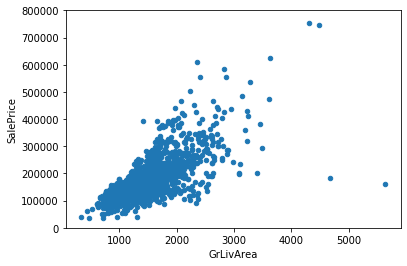

In [8]:
#representación saleprice/grlivarea
var = 'GrLivArea'
d = pd.concat([data['SalePrice'], data[var]], axis=1)
d.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**Vemos que hay valores atípicos que pueden influir en nuestro modelo lineal**

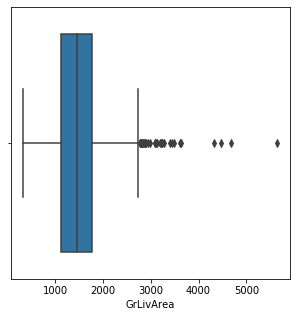

In [9]:
# Representacion de los valóres atípicos para LotArea
plt.figure(figsize=(5, 5))
sns.boxplot(x=var, data=data)

**Sacamos los datos atípicos.**

In [10]:
Q1 = np.percentile(data[var], 25)
Q3 = np.percentile(data[var], 75)
iqr = Q3 - Q1
lower_limit = Q1 - 1.5 * iqr
higher_limit = Q3 + 1.5 * iqr

In [12]:
# Obtenemos los indices de los outliers para lotArea y los agrupamos en una lista
lower_outliers = data[data[var] < lower_limit].index
higher_outliers = data[data[var] > higher_limit].index
outliers = np.concatenate([lower_outliers, higher_outliers], axis=0)

In [13]:
outliers

array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1385])

In [14]:
# Eliminamos los registros que son outliers
gr_liv_area = data[var].drop(data.index[outliers])
sale_price = data['SalePrice'].drop(data.index[outliers])

In [15]:
print("total datos: {0}".format(data.shape[0]))
print("datos sin outliers: {0}".format(gr_liv_area.shape[0]))
print("outliers: {0}".format(len(outliers)))

total datos: 1459
datos sin outliers: 1428
outliers: 31


**Armemos un dataframe con las variables para este caso.**

In [16]:
df = pd.DataFrame({'GrLivArea': gr_liv_area.to_list(), 'SalePrice': sale_price.to_list()})

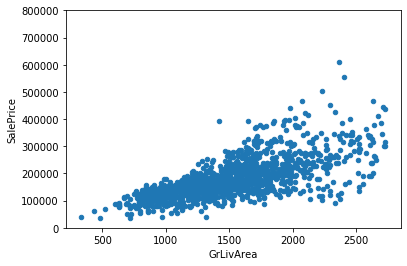

In [17]:
#Represientación saleprice/grlivarea
var = 'GrLivArea'
d = pd.concat([df['SalePrice'], df[var]], axis=1)
d.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### EJERCICIOS

**Observando la representación de la variable GrLivArea frente a SalePrice y basándose en lo visto en el teórico escojan y justifiquen un modelo de aprendizaje automático respondiendo esta serie de items:**

a - Selección de hipótesis,
¿Que tipo de modelo usarán?. Justifiquen su elección.

b - ¿Necesitamos usar algun tipo de regularizador para nuestro modelo?

c - Representen la salida del modelo sobre los datos y los parámetros del mismo.

**Scikit learn es una biblioteca muy detallada y facil de usar. Recuerden que necesitan serparar los datos en entrenamiento, validación (si tiene sentido) y test. Hay ejemplos en la documentacion de scikit-learn para resolver este tipo de problemas.** https://scikit-learn.org/stable/modules/linear_model.html